In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import xgboost
import warnings
warnings.filterwarnings('ignore')

In [37]:
data = pd.read_csv('BankChurners.csv')
data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [38]:
num = data.select_dtypes(include = 'number')
cat = data.select_dtypes(exclude = 'number')

print(f'Numerical Variables\n')
display(num.head())

print(f'Categorical Variables\n')
display(cat.head())

Numerical Variables



,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


Categorical Variables



,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,Existing Customer,M,High School,Married,$60K - $80K,Blue
1,Existing Customer,F,Graduate,Single,Less than $40K,Blue
2,Existing Customer,M,Graduate,Married,$80K - $120K,Blue
3,Existing Customer,F,High School,Unknown,Less than $40K,Blue
4,Existing Customer,M,Uneducated,Married,$60K - $80K,Blue


In [39]:
data['Income Category'] = data['Income_Category'].str.extract(r'(\d+)') # .......... extract all numericals from the column and save it to a new column
data['Income Category'] = data['Income Category'].astype(float) # .................. Turn the new column to a numerical datatype

data.drop(['CLIENTNUM', 'Income_Category'], axis = 1, inplace = True)
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Income Category
0,Existing Customer,45,M,3,High School,Married,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,60.0
1,Existing Customer,49,F,5,Graduate,Single,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,40.0
2,Existing Customer,51,M,3,Graduate,Married,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,80.0
3,Existing Customer,40,F,4,High School,Unknown,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,40.0
4,Existing Customer,40,M,3,Uneducated,Married,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,60.0


<b><h3>BIVARIATE ANALYSIS

# Questions
# Show the distribution of income according to education level
# Using Credit Limit as a metric, show the heirarchy of customers' importance based on card cateogry
# Show the distribution of Education Level according to card category
# Credit Limit refers to the maximum credit takeable by a customer. Does individual income determine this limit?

[Text(0, 0, '56.9')]

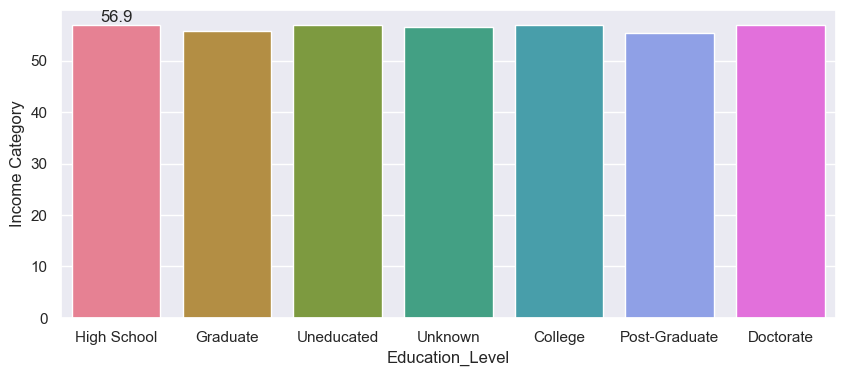

In [40]:
# Show the distribution of income according to education level

plt.figure(figsize = (10, 4))
fig = sns.barplot(x = data.Education_Level, y = data['Income Category'], ci = 0, palette = 'husl')
fig.bar_label(fig.containers[0], fmt = '%.1f')

<b><h3>MULTIVARIATE ANALYSIS

In [41]:
# Questions
# Visualise the average age of each varying card category while showing their gender distribution
# Using a correlation matrix, visualize the relationship of all numerical values

<Axes: >

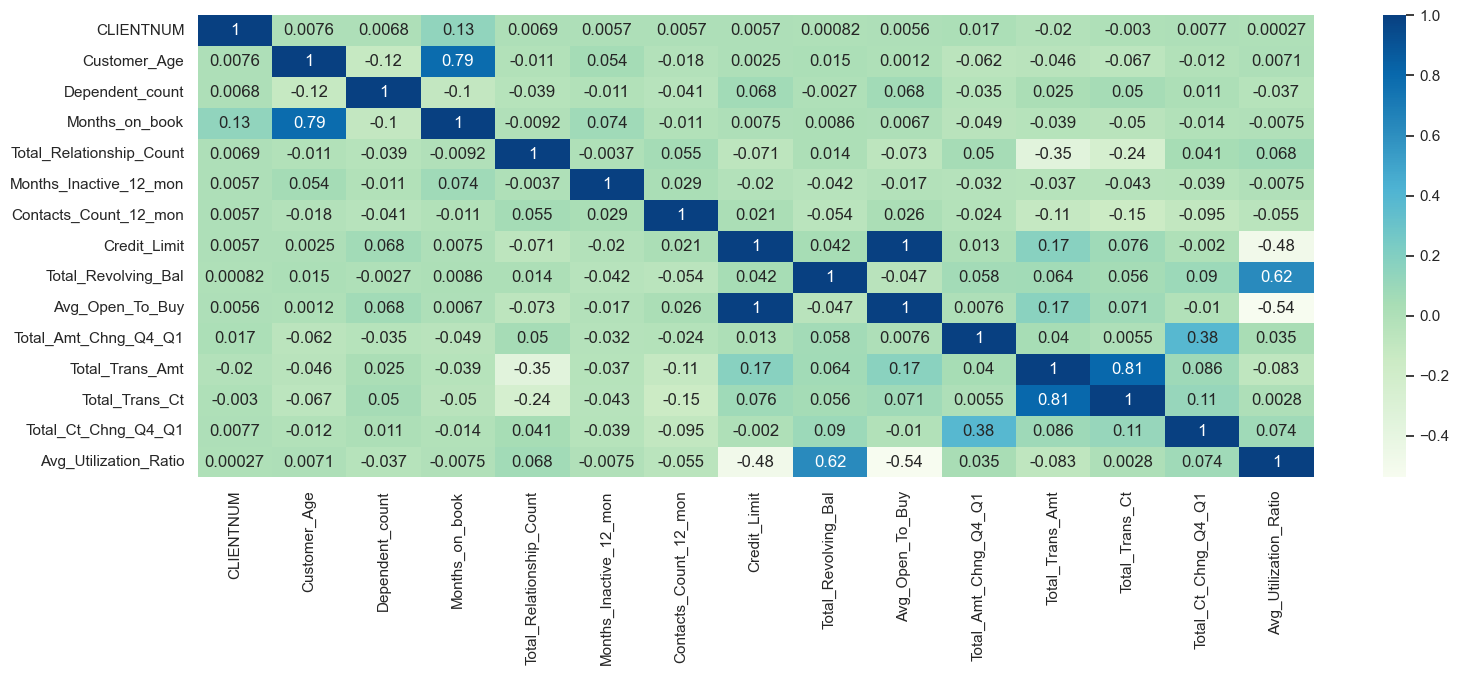

In [42]:
plt.figure(figsize = (18, 6))
sns.heatmap(num.corr(), annot = True, cmap = 'GnBu')

<b><h3>Feature Engineering

In [43]:
data.head()


,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Income Category
0,Existing Customer,45,M,3,High School,Married,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,60.0
1,Existing Customer,49,F,5,Graduate,Single,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,40.0
2,Existing Customer,51,M,3,Graduate,Married,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,80.0
3,Existing Customer,40,F,4,High School,Unknown,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,40.0
4,Existing Customer,40,M,3,Uneducated,Married,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,60.0


In [44]:
birth = pd.Series([2024 - i for i in data['Customer_Age']])
data['Birth Year'] = birth

# OR

birth_year = []

for i in data['Customer_Age']:
    birth_year.append(2024 - i)

# convert new_list(birth_year) to series
birth_year = pd.Series(birth_year)
data['Birth Year'] = birth_year

data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Income Category,Birth Year
0,Existing Customer,45,M,3,High School,Married,Blue,39,5,1,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,60.0,1979
1,Existing Customer,49,F,5,Graduate,Single,Blue,44,6,1,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,40.0,1975
2,Existing Customer,51,M,3,Graduate,Married,Blue,36,4,1,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,80.0,1973
3,Existing Customer,40,F,4,High School,Unknown,Blue,34,3,4,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,40.0,1984
4,Existing Customer,40,M,3,Uneducated,Married,Blue,21,5,1,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,60.0,1984


In [45]:
# Remove 'Unknown' Marital Status
data = data.loc[data['Marital_Status'] != 'Unknown']

In [46]:
data = data.loc[data['Education_Level'] != 'Unknown']

In [47]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for i in cat.columns:
    if i in data.columns:
        data[i] = encoder.fit_transform(data[i])

data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Income Category,Birth Year
0,1,45,1,3,3,1,0,39,5,1,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,60.0,1979
1,1,49,0,5,2,2,0,44,6,1,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,40.0,1975
2,1,51,1,3,2,1,0,36,4,1,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,80.0,1973
4,1,40,1,3,5,1,0,21,5,1,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,60.0,1984
5,1,44,1,2,2,1,0,36,3,1,...,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,40.0,1980


<b><h3>Feature Selection

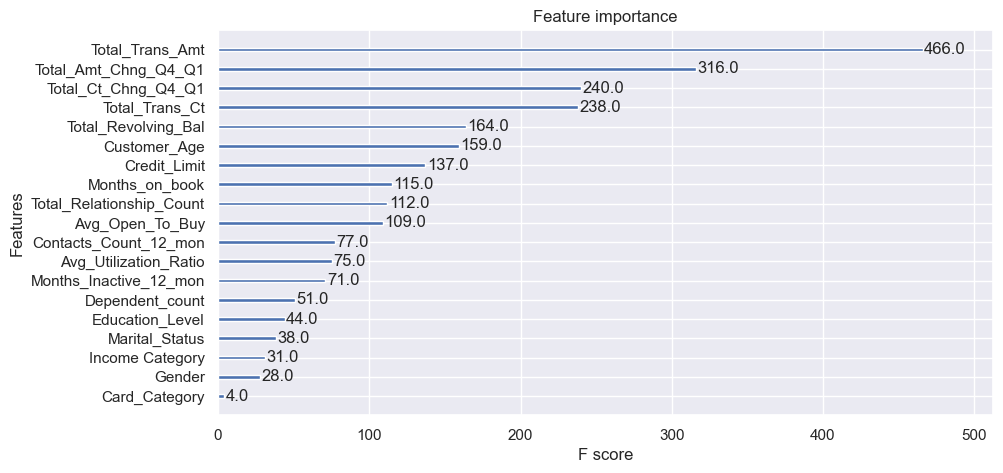

In [48]:
# - Using XGBOOST to find feature importance
import xgboost as xgb
model = xgb.XGBClassifier()

x = data.drop('Attrition_Flag', axis = 1)
y = data.Attrition_Flag

model.fit(x, y)

plt.rcParams['figure.figsize'] = (10, 5)
# Print feature importance scores
xgb.plot_importance(model, importance_type= 'weight')
plt.show()

In [49]:
sel_columns = ['Total_Trans_Amt', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1', 'Total_Trans_Ct',
 'Total_Revolving_Bal', 'Customer_Age', 'Credit_Limit', 'Attrition_Flag']

sel_data = data[sel_columns]
sel_data

,Total_Trans_Amt,Total_Amt_Chng_Q4_Q1,Total_Ct_Chng_Q4_Q1,Total_Trans_Ct,Total_Revolving_Bal,Customer_Age,Credit_Limit,Attrition_Flag
0,1144,1.335,1.625,42,777,45,12691.0,1
1,1291,1.541,3.714,33,864,49,8256.0,1
2,1887,2.594,2.333,20,0,51,3418.0,1
4,816,2.175,2.500,28,0,40,4716.0,1
5,1088,1.376,0.846,24,1247,44,4010.0,1
...,...,...,...,...,...,...,...,...
10120,15577,0.660,0.754,114,2109,54,13940.0,1
10121,14596,0.570,0.791,120,606,56,3688.0,1
10122,15476,0.703,0.857,117,1851,50,4003.0,1
10124,10291,0.819,0.818,60,0,44,5409.0,0


<b><h3>Model Selection

<Axes: xlabel='Attrition_Flag', ylabel='count'>

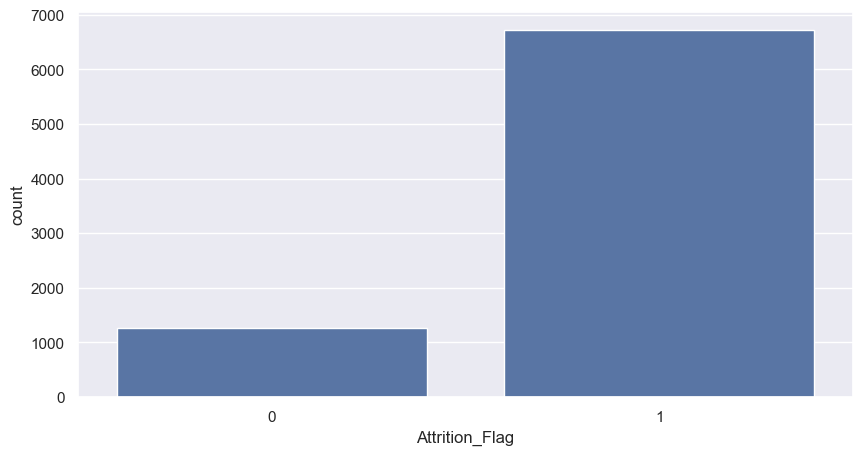

In [50]:
sns.countplot(x = data.Attrition_Flag)

In [51]:
x = sel_data.drop('Attrition_Flag', axis = 1)
y = sel_data.Attrition_Flag

# split into train and test
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 98, stratify = y)

<hr>
<h3><b>Random Undersampling

In [52]:
full_data = pd.concat([xtrain, ytrain], axis = 1)

class_0 = full_data.loc[full_data['Attrition_Flag'] == 0]
class_1 = full_data.loc[full_data['Attrition_Flag'] == 1]

print(f'Class of Zero shape: {class_0.shape}\nClass of One shape: {class_1.shape}')


Class of Zero shape: (1006, 8)
Class of One shape: (5372, 8)


In [53]:
new_class1 = class_1.sample(1000)
new_class1.shape

(1000, 8)

(2006, 8)


<Axes: xlabel='Attrition_Flag', ylabel='count'>

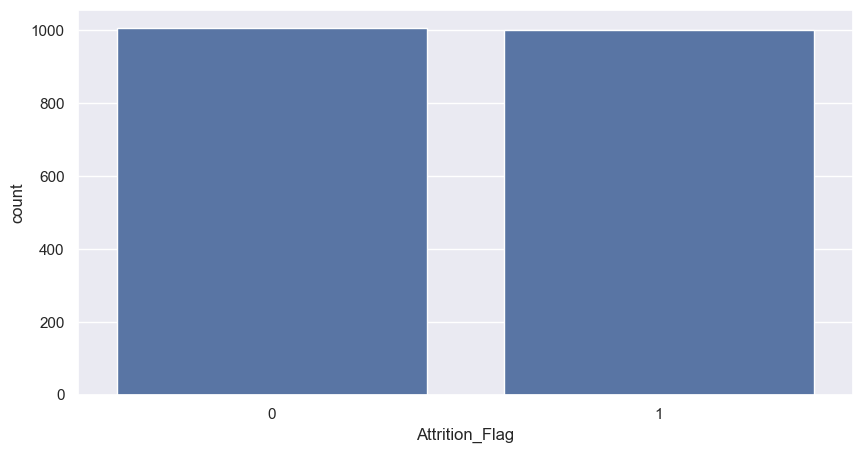

In [54]:
new_balanced_data = pd.concat([class_0, new_class1], axis = 0) # -------- Join the data together
print(new_balanced_data.shape)

sns.set(style = 'darkgrid')
sns.countplot(x = new_balanced_data['Attrition_Flag'])

In [55]:
new_balanced_data

,Total_Trans_Amt,Total_Amt_Chng_Q4_Q1,Total_Ct_Chng_Q4_Q1,Total_Trans_Ct,Total_Revolving_Bal,Customer_Age,Credit_Limit,Attrition_Flag
9926,9451,0.915,0.646,79,2517,29,6500.0,0
7118,2684,0.721,0.560,39,2517,45,3489.0,0
7948,2156,0.496,0.194,37,0,41,1655.0,0
6810,2616,0.791,0.469,47,0,50,3546.0,0
6534,2245,0.491,0.464,41,2404,41,2811.0,0
...,...,...,...,...,...,...,...,...
9929,14596,0.647,0.733,104,979,30,4107.0,1
2876,3849,0.909,0.591,70,1388,51,7570.0,1
4216,4450,0.934,0.545,68,1598,49,2115.0,1
3884,4218,0.371,0.636,72,1909,65,3305.0,1


In [56]:
pip install imblearn

You should consider upgrading via the 'c:\Users\HP\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


<hr>
<h3><b>Random oversampling using Synthetic Minority Oversampling Technique (SMOTE)

In [57]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy= 'auto', random_state=5)
X_resampled, y_resampled = smote.fit_resample(xtrain, ytrain)

<Axes: xlabel='Attrition_Flag', ylabel='count'>

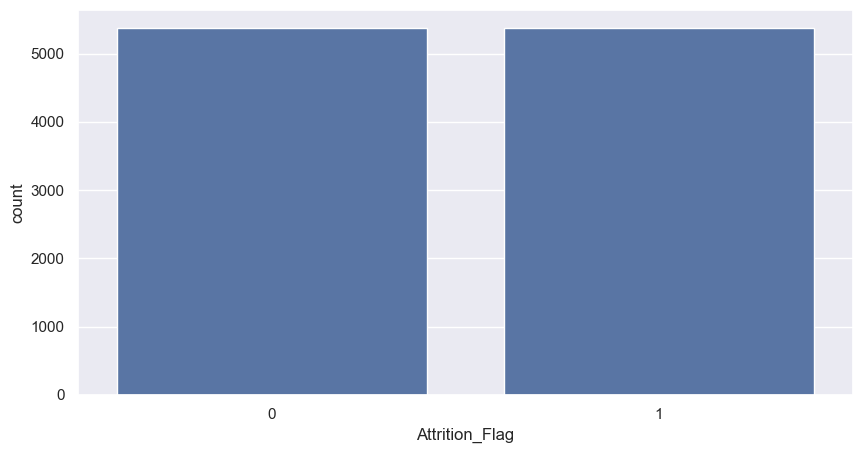

In [58]:
new_balanced_data_smote = pd.concat([X_resampled, y_resampled], axis = 1)

sns.countplot(x = new_balanced_data_smote['Attrition_Flag'])

In [59]:
# Algorithms To Be Used
RandomForest Classifier
DecisionTree Classifier
XGBoost Classifier
Support Vector Classifier


SyntaxError: invalid syntax. Perhaps you forgot a comma? (3531049659.py, line 2)

In [ ]:
# getting the best random to use for the smote
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

scores = [] # -------------------------------------------------------------- Create a list to store the scores of each loop
for i in range(100):
    smote = SMOTE(sampling_strategy= 'auto', random_state= i)
    X_resampled, y_resampled = smote.fit_resample(xtrain, ytrain)

    # Creating a model
    model= LogisticRegression()
    model.fit(X_resampled, y_resampled)

    scores.append(accuracy_score(model.predict(X_resampled), y_resampled))

In [ ]:
import numpy as np
print(f'Best Random State To Use: {np.array(scores).argmax()}')

Best Random State To Use: 41


In [ ]:
smote = SMOTE(sampling_strategy= 'auto', random_state= 42)
X_resampled, y_resampled = smote.fit_resample(xtrain, ytrain)

model= LogisticRegression()
model.fit(X_resampled, y_resampled)

LogisticRegression()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(model.predict(X_resampled), y_resampled))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      5343
           1       0.82      0.82      0.82      5401

    accuracy                           0.82     10744
   macro avg       0.82      0.82      0.82     10744
weighted avg       0.82      0.82      0.82     10744



In [ ]:
def modeller(x_train, y_train, x_test, y_test, show_train_score = None):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.tree import DecisionTreeClassifier
    from xgboost import XGBClassifier
    from sklearn.svm import SVC
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import accuracy_score

    # list of algorithms to be used
    algorithms = [RandomForestClassifier(), XGBClassifier(), DecisionTreeClassifier(), SVC(kernel = 'poly'), LogisticRegression()]

    # keep the training and test scores
    scores = []
    train_validator = []

    for i in algorithms:
        model_name = i
        model_name.fit(x_train, y_train)
        model_validate = model_name.predict(x_train)
        train_validator.append(accuracy_score(model_validate, y_train))

        test_perf = model_name.predict(x_test)
        scores.append(accuracy_score(test_perf, y_test))

    # create a table for each algorithms and scores
    compare_table = pd.DataFrame()
    compare_table['Algorithm'] = pd.Series(algorithms)
    compare_table['Accuracy'] = pd.Series(scores)

    if show_train_score == 'show_train':
        compare_table['Training Accuracy'] = pd.Series(train_validator)
        return compare_table.sort_values(by = 'Accuracy', ascending = False), compare_table['Algorithm'][0], compare_table['Algorithm'][1]
    else:
        return compare_table.sort_values(by = 'Accuracy', ascending = False), compare_table['Algorithm'][0], compare_table['Algorithm'][1]


table, model1, model2 = modeller(X_resampled, y_resampled, xtest, ytest, show_train_score = 'show_train')
table

,Algorithm,Accuracy,Training Accuracy
1,"XGBClassifier(base_score=None, booster=None, c...",0.963009,0.999442
0,"(DecisionTreeClassifier(max_features='sqrt', r...",0.956740,1.000000
2,DecisionTreeClassifier(),0.936050,1.000000
4,LogisticRegression(),0.818809,0.819341
3,SVC(kernel='poly'),0.373041,0.601638


In [ ]:
X_resampled

,Total_Trans_Amt,Total_Amt_Chng_Q4_Q1,Total_Ct_Chng_Q4_Q1,Total_Trans_Ct,Total_Revolving_Bal,Customer_Age,Credit_Limit
0,4425,0.769000,0.696000,78,0,50,20958.000000
1,3723,0.735000,0.767000,53,0,52,31733.000000
2,3688,0.702000,0.757000,65,1101,43,10851.000000
3,4933,0.627000,0.545000,68,1935,41,8228.000000
4,9451,0.915000,0.646000,79,2517,29,6500.000000
...,...,...,...,...,...,...,...
10739,8580,1.025361,0.848040,69,1418,41,4046.790791
10740,786,0.591282,0.801486,15,238,38,27877.655725
10741,2396,0.767180,0.544715,42,0,46,2760.553465
10742,1657,0.176456,0.428351,39,0,45,1476.259204


In [ ]:
b = train = 95, 90
c = train = 92, 89

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5378
           1       1.00      1.00      1.00      5366

    accuracy                           1.00     10744
   macro avg       1.00      1.00      1.00     10744
weighted avg       1.00      1.00      1.00     10744



<Axes: >

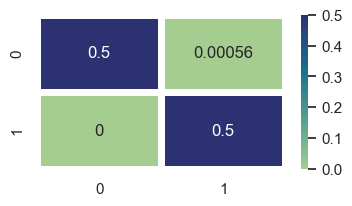

In [ ]:
# --------- XGBOOST CLASSIFIER MODELLING --------------
from xgboost import XGBClassifier

xgb_model = XGBClassifier()

xgb_model.fit(X_resampled, y_resampled)

cross_validation = xgb_model.predict(X_resampled)
print(classification_report(cross_validation, y_resampled))

revealer = confusion_matrix(cross_validation, y_resampled)
plt.figure(figsize = (4,2))
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot=True, cmap='crest', linewidth=5)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5372
           1       1.00      1.00      1.00      5372

    accuracy                           1.00     10744
   macro avg       1.00      1.00      1.00     10744
weighted avg       1.00      1.00      1.00     10744



<Axes: >

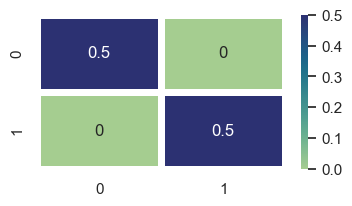

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rand_model = RandomForestClassifier()

rand_model.fit(X_resampled, y_resampled)

cross_validation = rand_model.predict(X_resampled)
print(classification_report(cross_validation, y_resampled))

revealer = confusion_matrix(cross_validation, y_resampled)
plt.figure(figsize = (4,2))
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot=True, cmap='crest', linewidth=5)

              precision    recall  f1-score   support

           0       0.92      0.83      0.87       276
           1       0.97      0.98      0.97      1319

    accuracy                           0.96      1595
   macro avg       0.94      0.91      0.92      1595
weighted avg       0.96      0.96      0.96      1595



<Axes: >

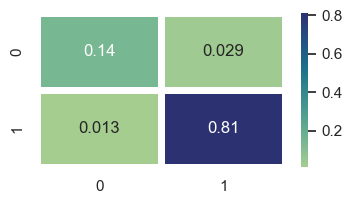

In [60]:
# Check For Overfitting

test_prediction = rand_model.predict(xtest)
print(classification_report(test_prediction, ytest))

revealer = confusion_matrix(test_prediction, ytest)
plt.figure(figsize = (4,2))
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot=True, cmap='crest', linewidth=5)

In [ ]:
#Export the model
import pickle, joblib 

pickle.dump(rand_model, open('BankChurners.pkl', "wb"))

In [ ]:
# Export the model
import pickle

pickle.dump(xgb_model, open('churners_model.pkl', "wb"))

In [ ]:
imported_model = joblib.load('churners_model.pkl')

imported_model.predict([[3730, 	0.836, 	0.941 ,	66 	,1153 ,	50 ,	2845.0 	]])

array([1])